In [11]:
import numpy as np
import os
from astropy.cosmology import Planck15 as cosmo, z_at_value
from astropy import units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import coop_post_processing as cpp
import matplotlib as mpl
#matplotlib settings
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=False)
from PIL import Image
from scipy import ndimage

# set plot params
mpl.rcParams['figure.figsize'] = [7.0, 5.0]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 16

## Show the stacked image

In [2]:
def cormat(covmat):
    cormat = np.zeros(covmat.shape)
    for i in range(covmat.shape[0]):
        for j in range(covmat.shape[1]):
            corcoeff = covmat[i,j]/np.sqrt(covmat[i,i]*covmat[j,j])
            cormat[i,j] = corcoeff
    return cormat


In [3]:
buzz_img = np.loadtxt("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_1418_1945Mpc_13pt9Mpc_allnu_alle_smth_24regallreg_combined_stack.txt")
grf_img  = np.loadtxt("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_1418_1945Mpc_13pt9Mpc_smth_24mapallmap_combined_stack.txt")
grf_img_thr  = np.loadtxt("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_1418_1945Mpc_13pt9Mpc_nugt2_egtpt3_smth_24mapallmap_combined_stack.txt")

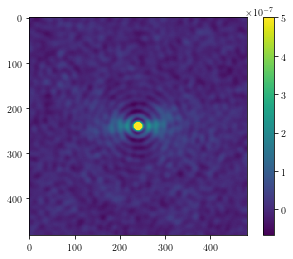

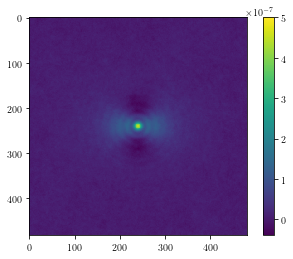

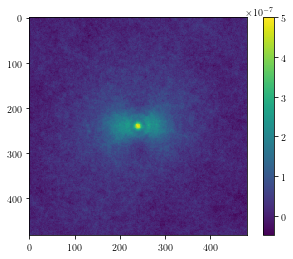

In [4]:
plt.imshow(buzz_img, vmax=5e-7)
plt.colorbar()
plt.show()
plt.clf()
plt.imshow(grf_img, vmax=5e-7)
plt.colorbar()
plt.show()
plt.clf()
plt.imshow(grf_img_thr, vmax=5e-7)
plt.colorbar()

## Plot slices through vertical

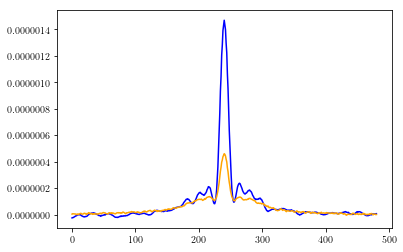

In [5]:
plt.plot(np.arange(buzz_img.shape[0]),buzz_img[round(buzz_img.shape[0]/2.),:], color='blue')
plt.plot(np.arange(grf_img.shape[0]),grf_img[round(buzz_img.shape[0]/2.),:], color='orange')

# plt.plot(np.arange(buzz_img.shape[0]),buzz_img[:, round(buzz_img.shape[0]/2.)], color='purple')
# plt.plot(np.arange(grf_img.shape[0]),grf_img[:, round(buzz_img.shape[0]/2.)], color='red')

GRF npeaks 8529 1008
Buzzard npkeas 8281 1349


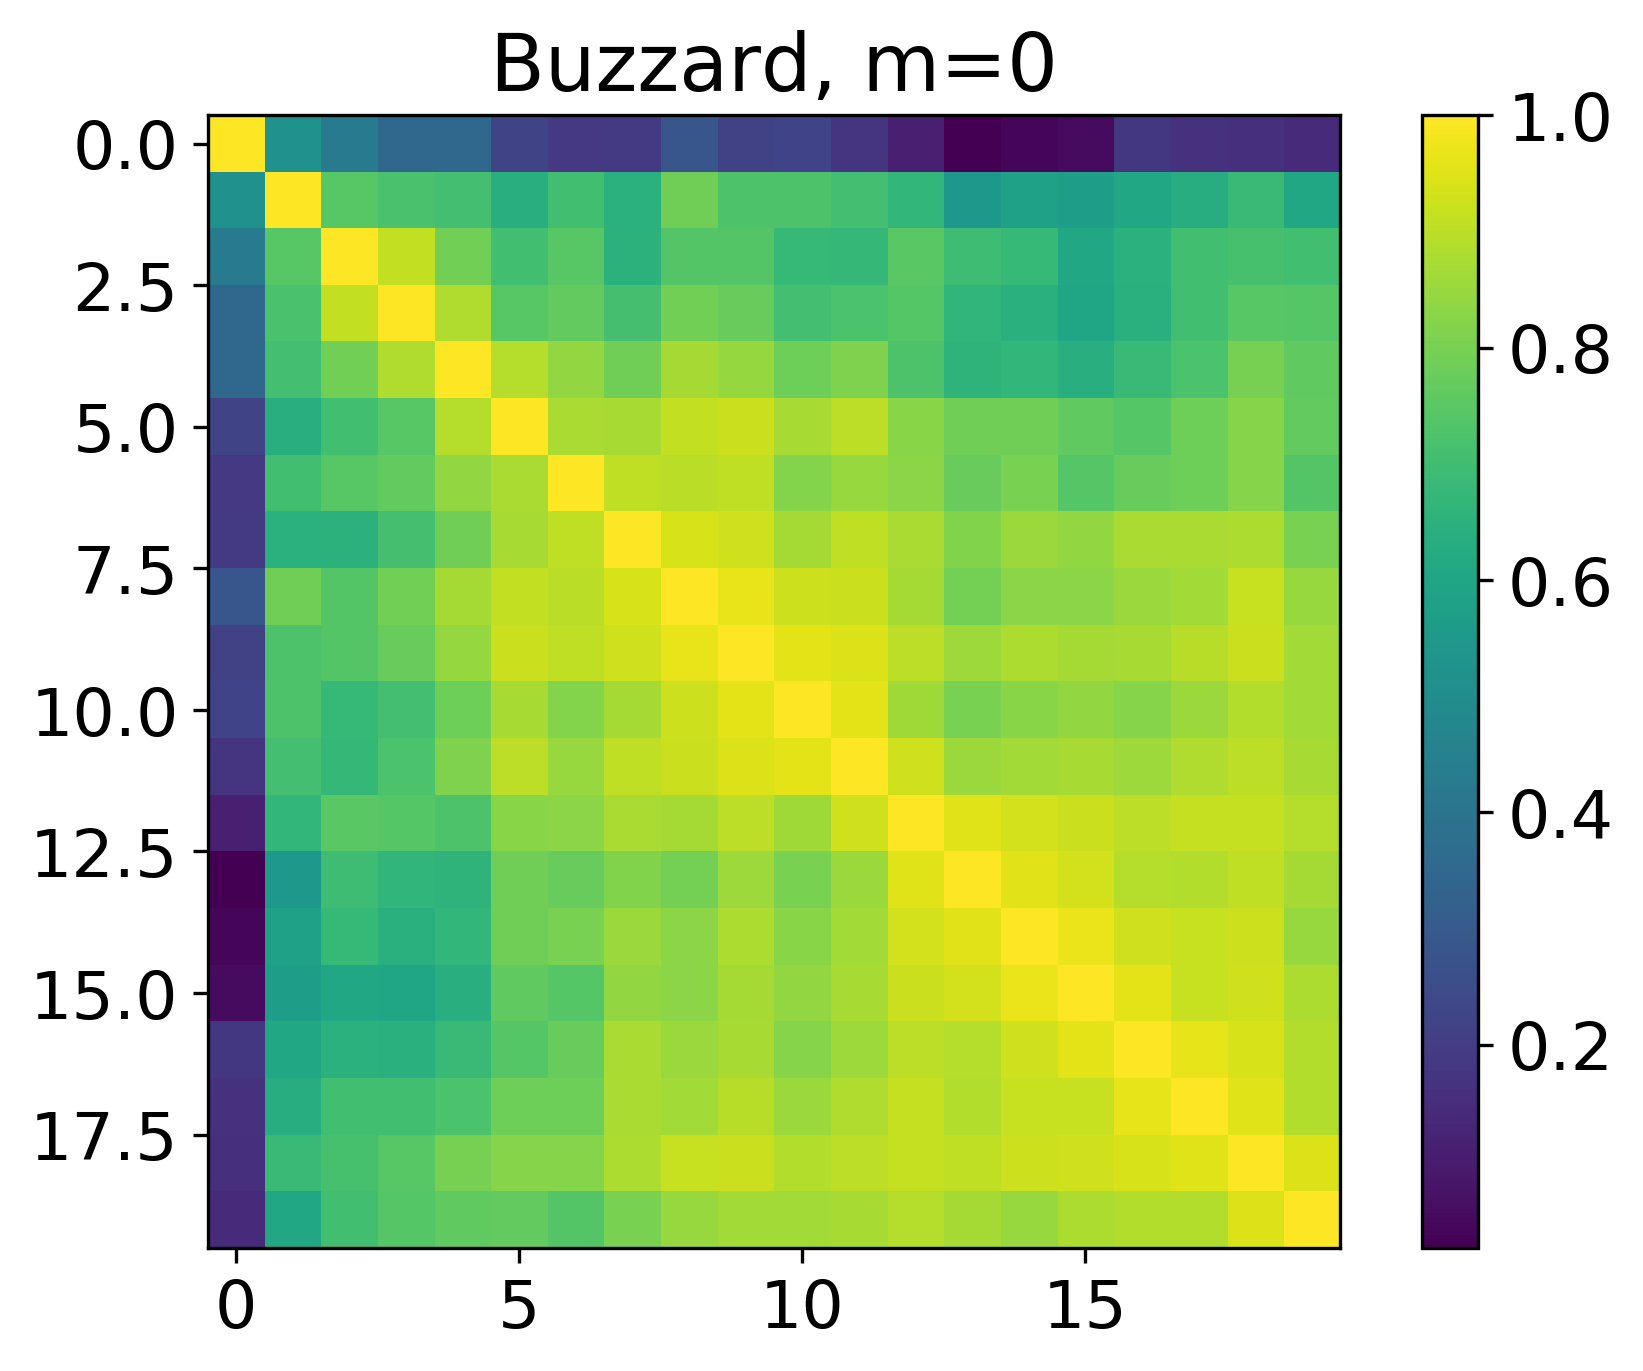

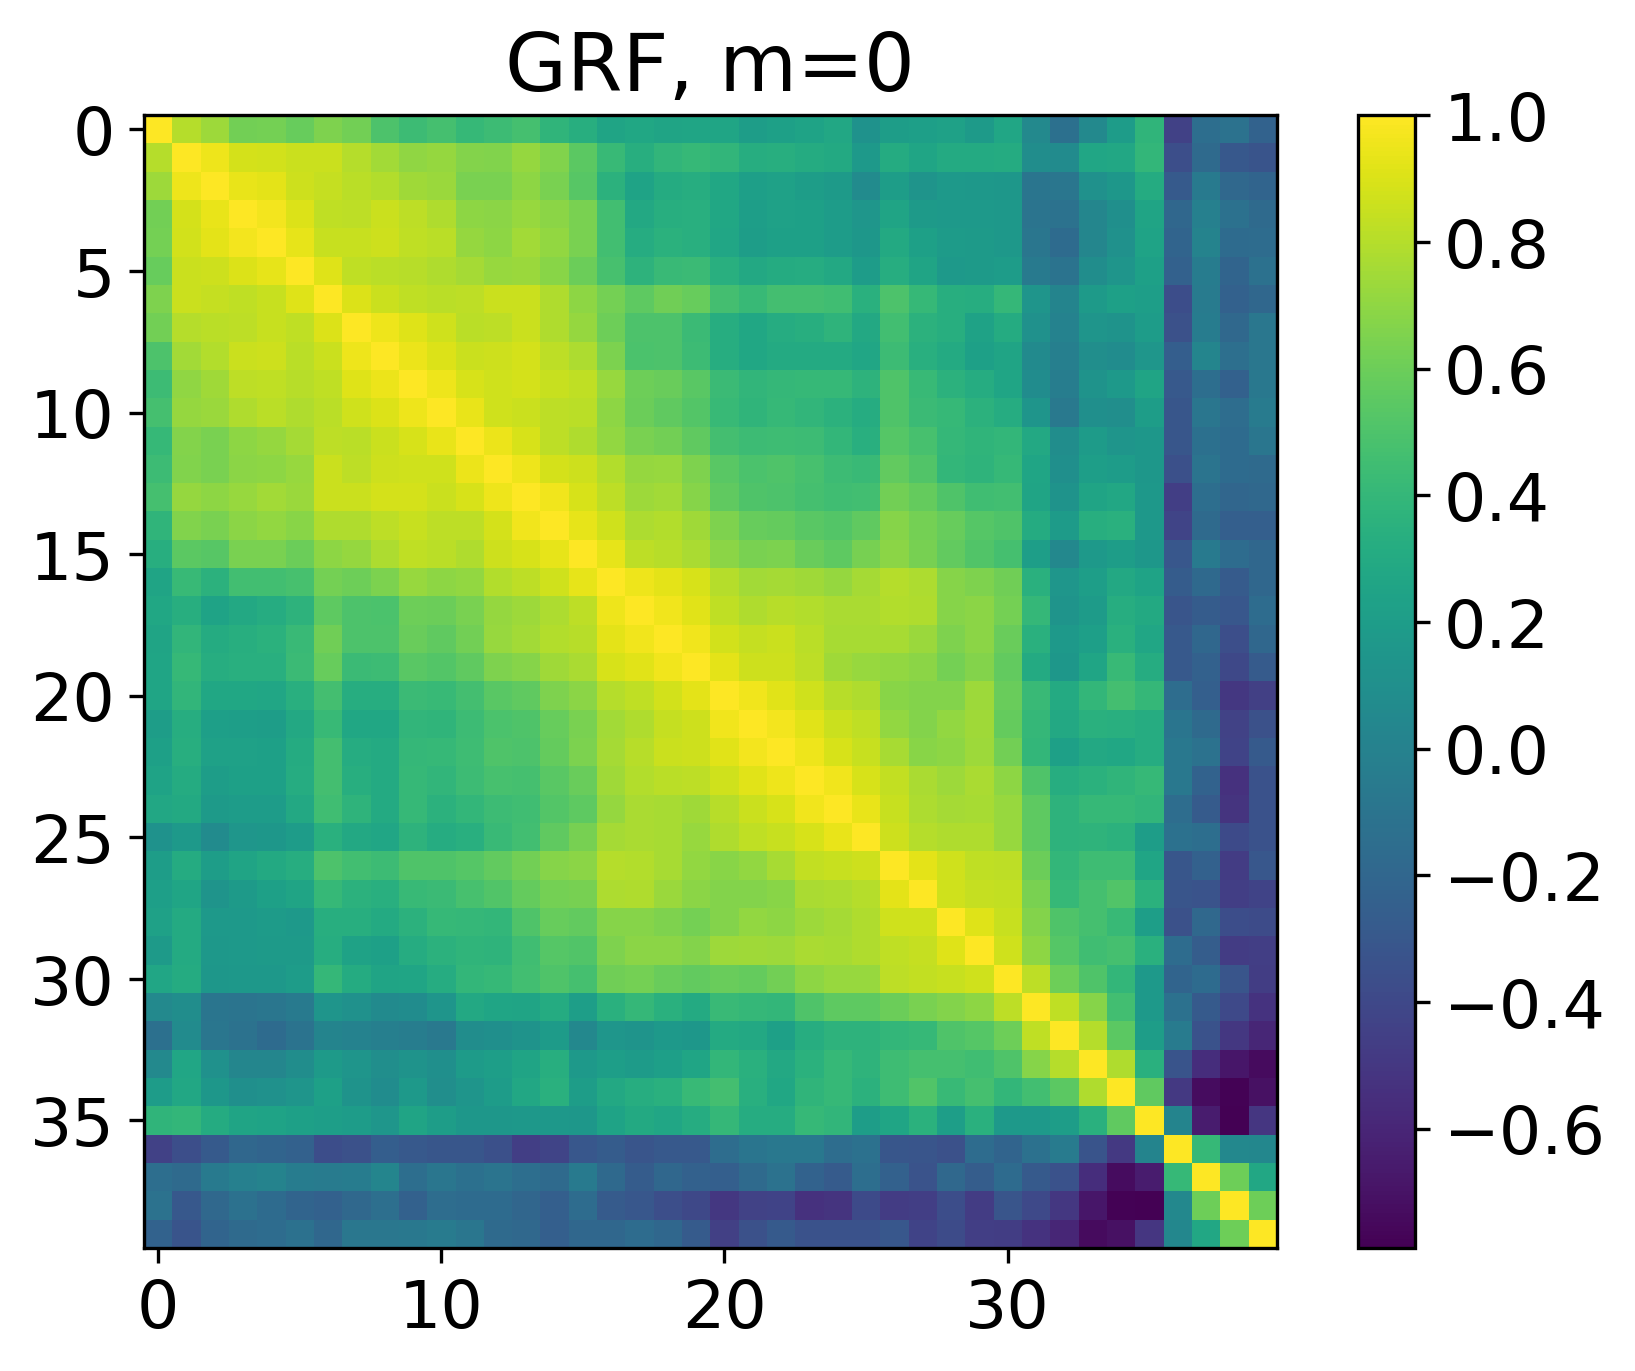

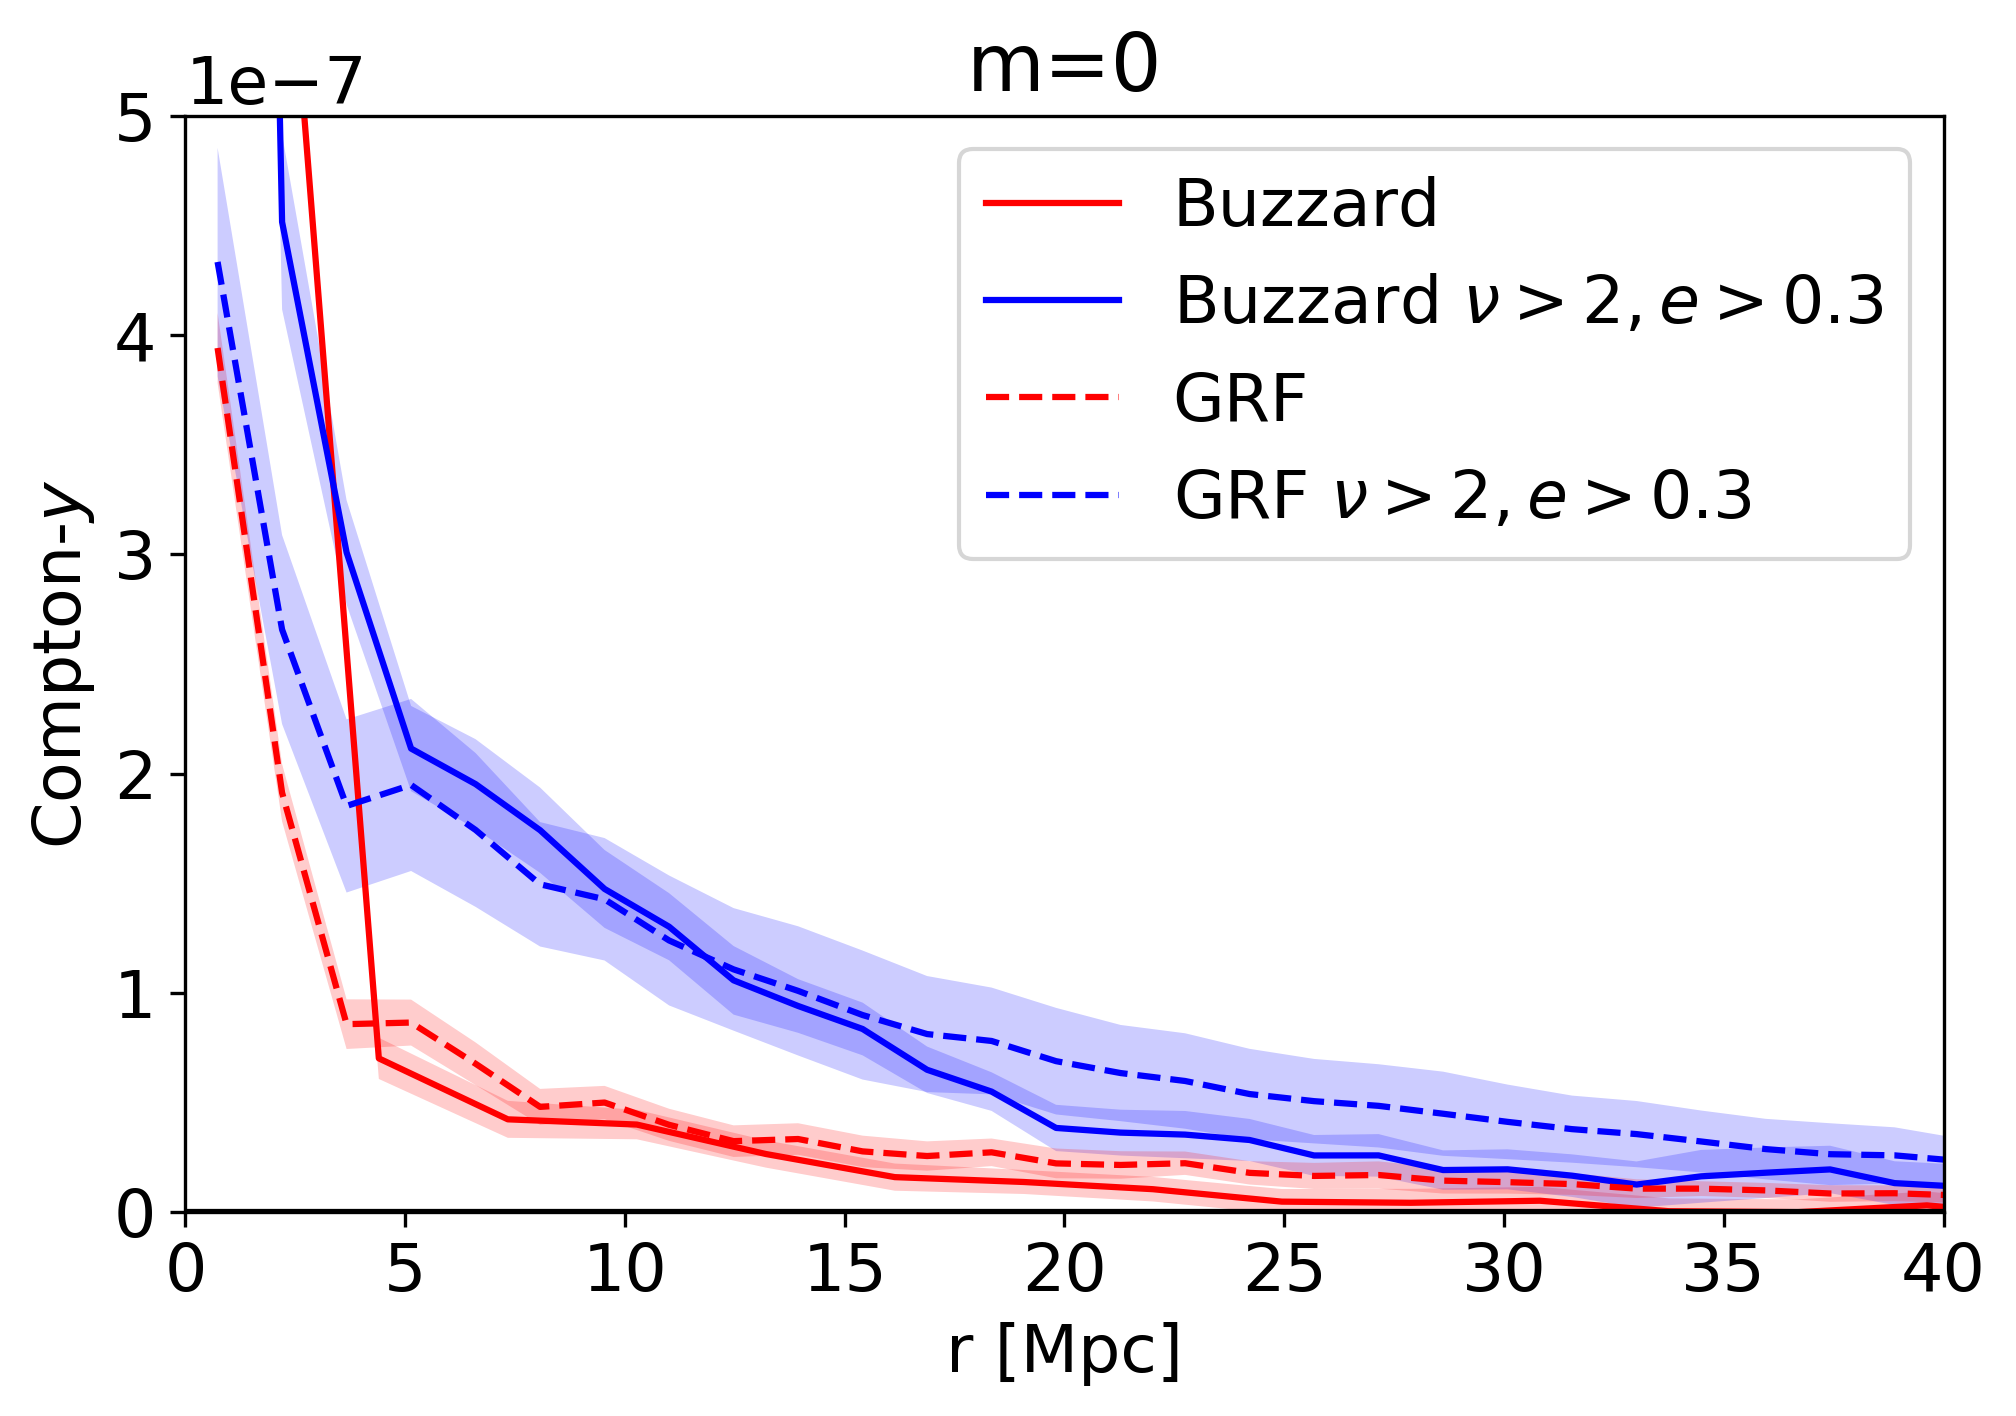

GRF npeaks 8529 1008
Buzzard npkeas 8281 1349


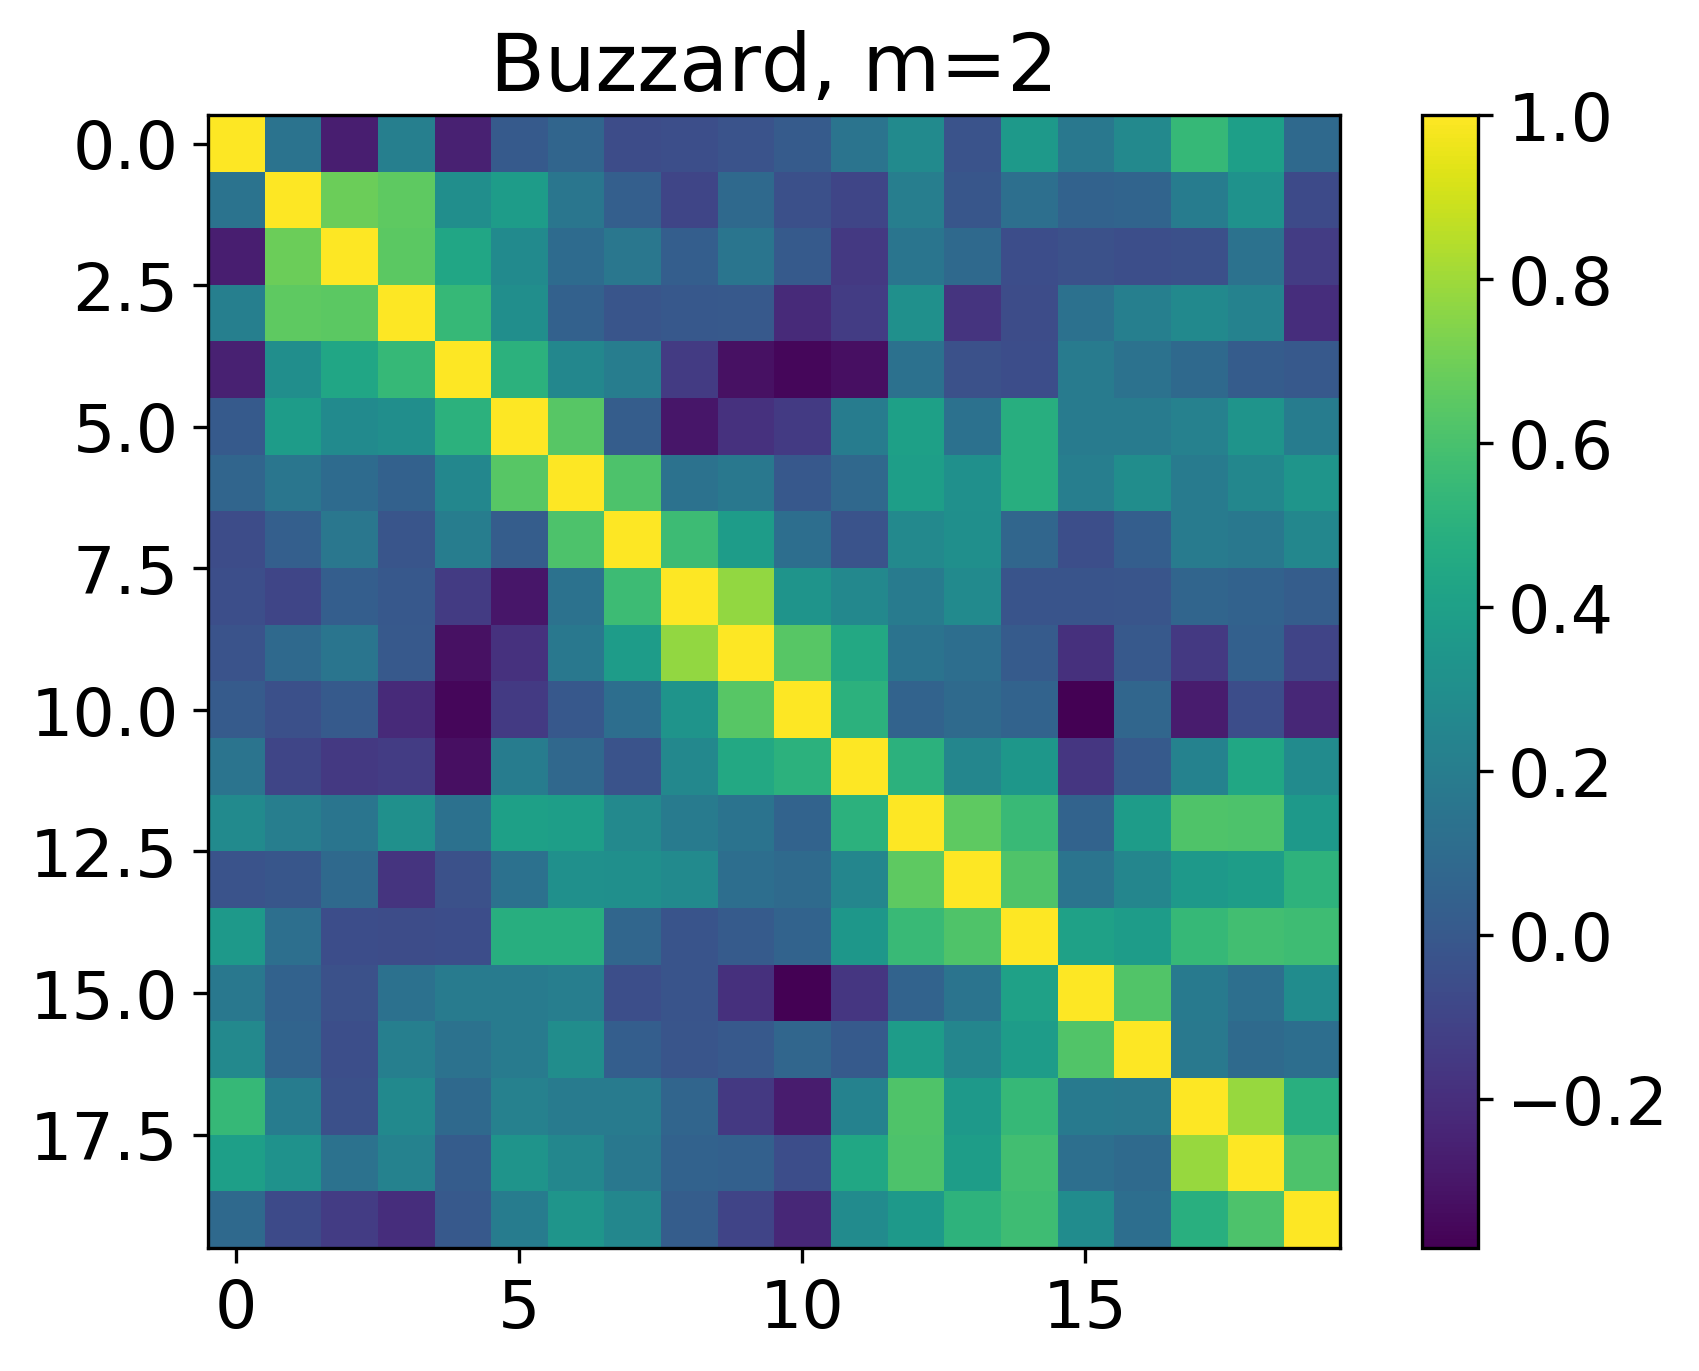

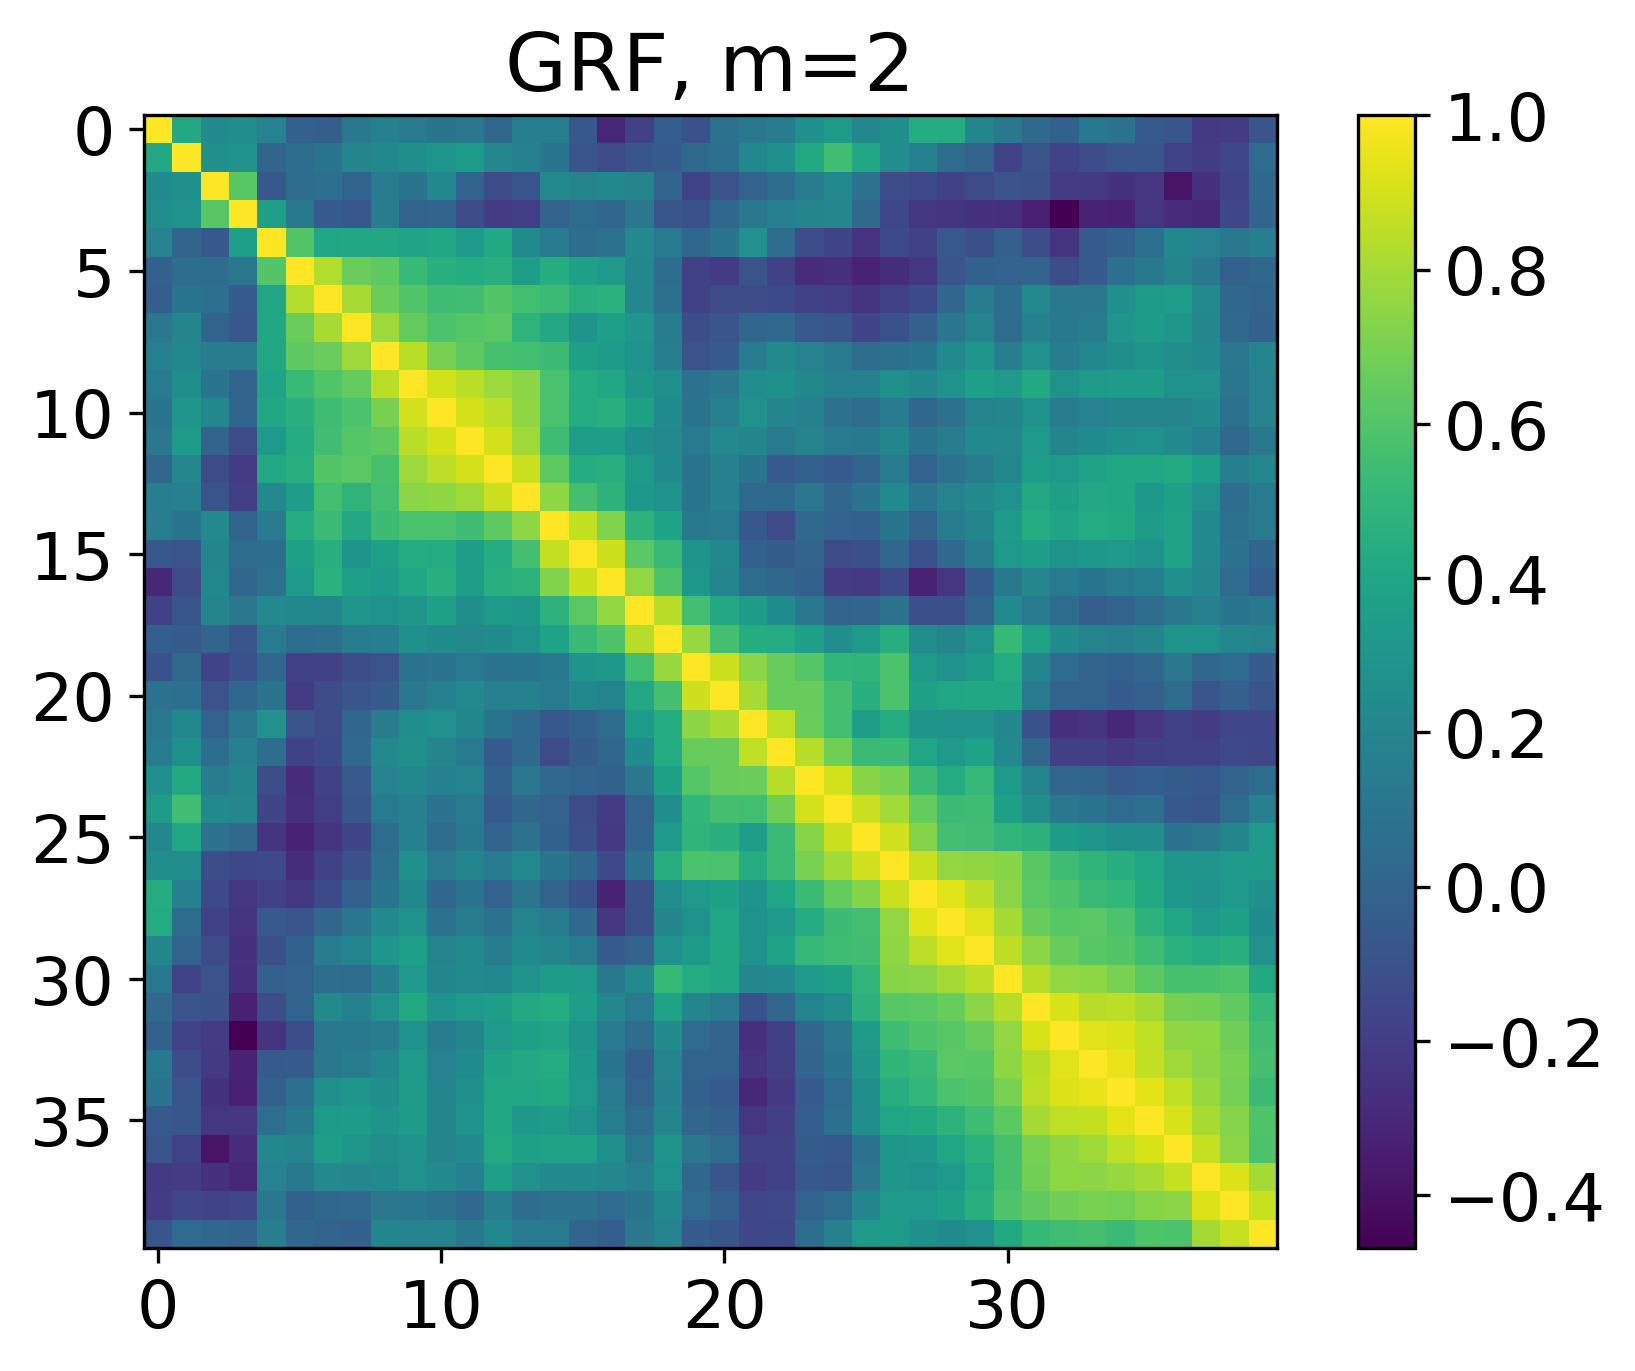

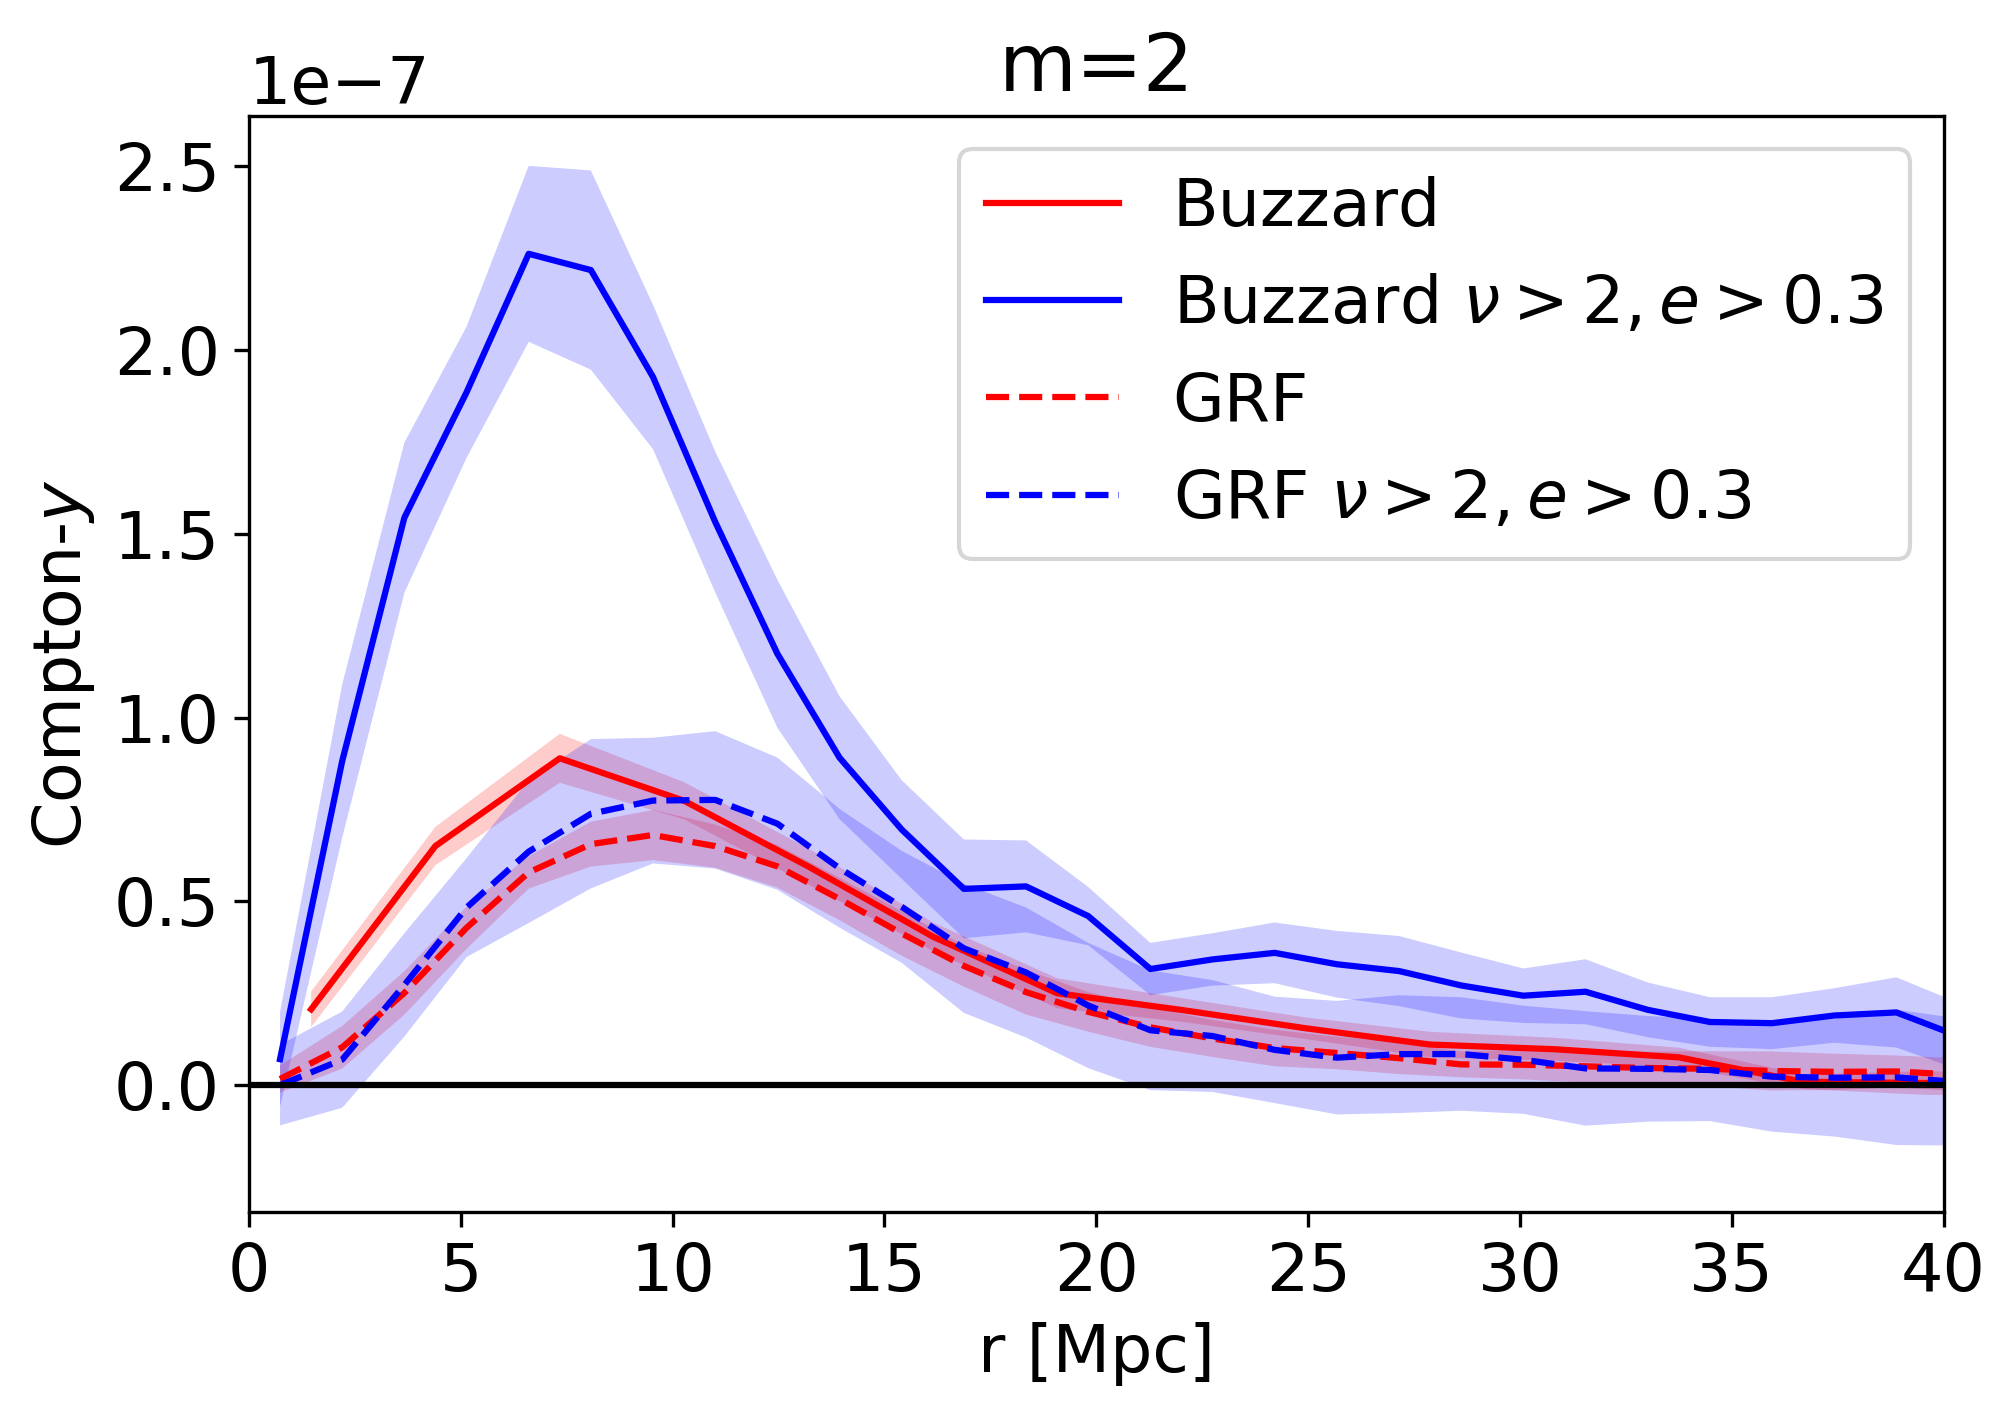

GRF npeaks 8529 1008
Buzzard npkeas 8281 1349


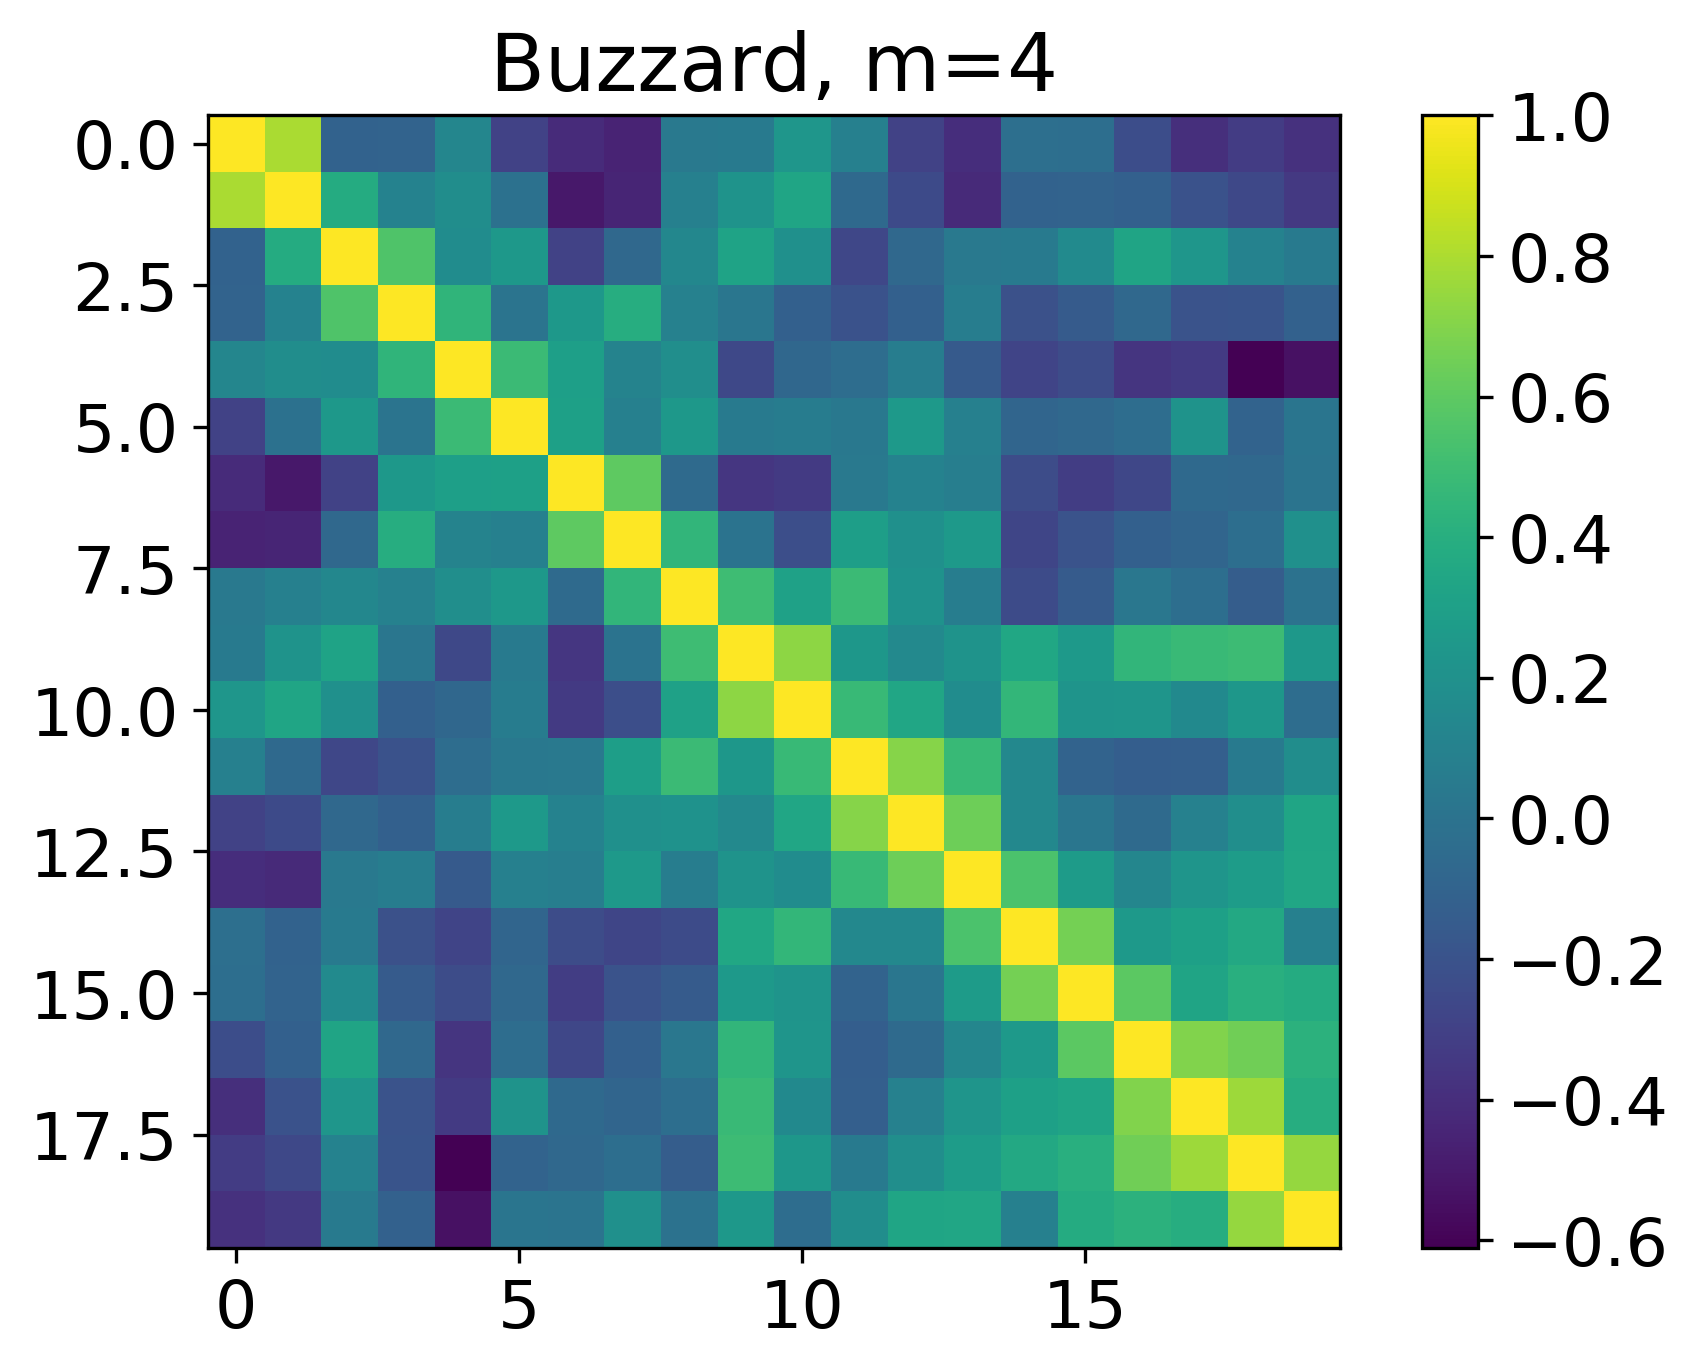

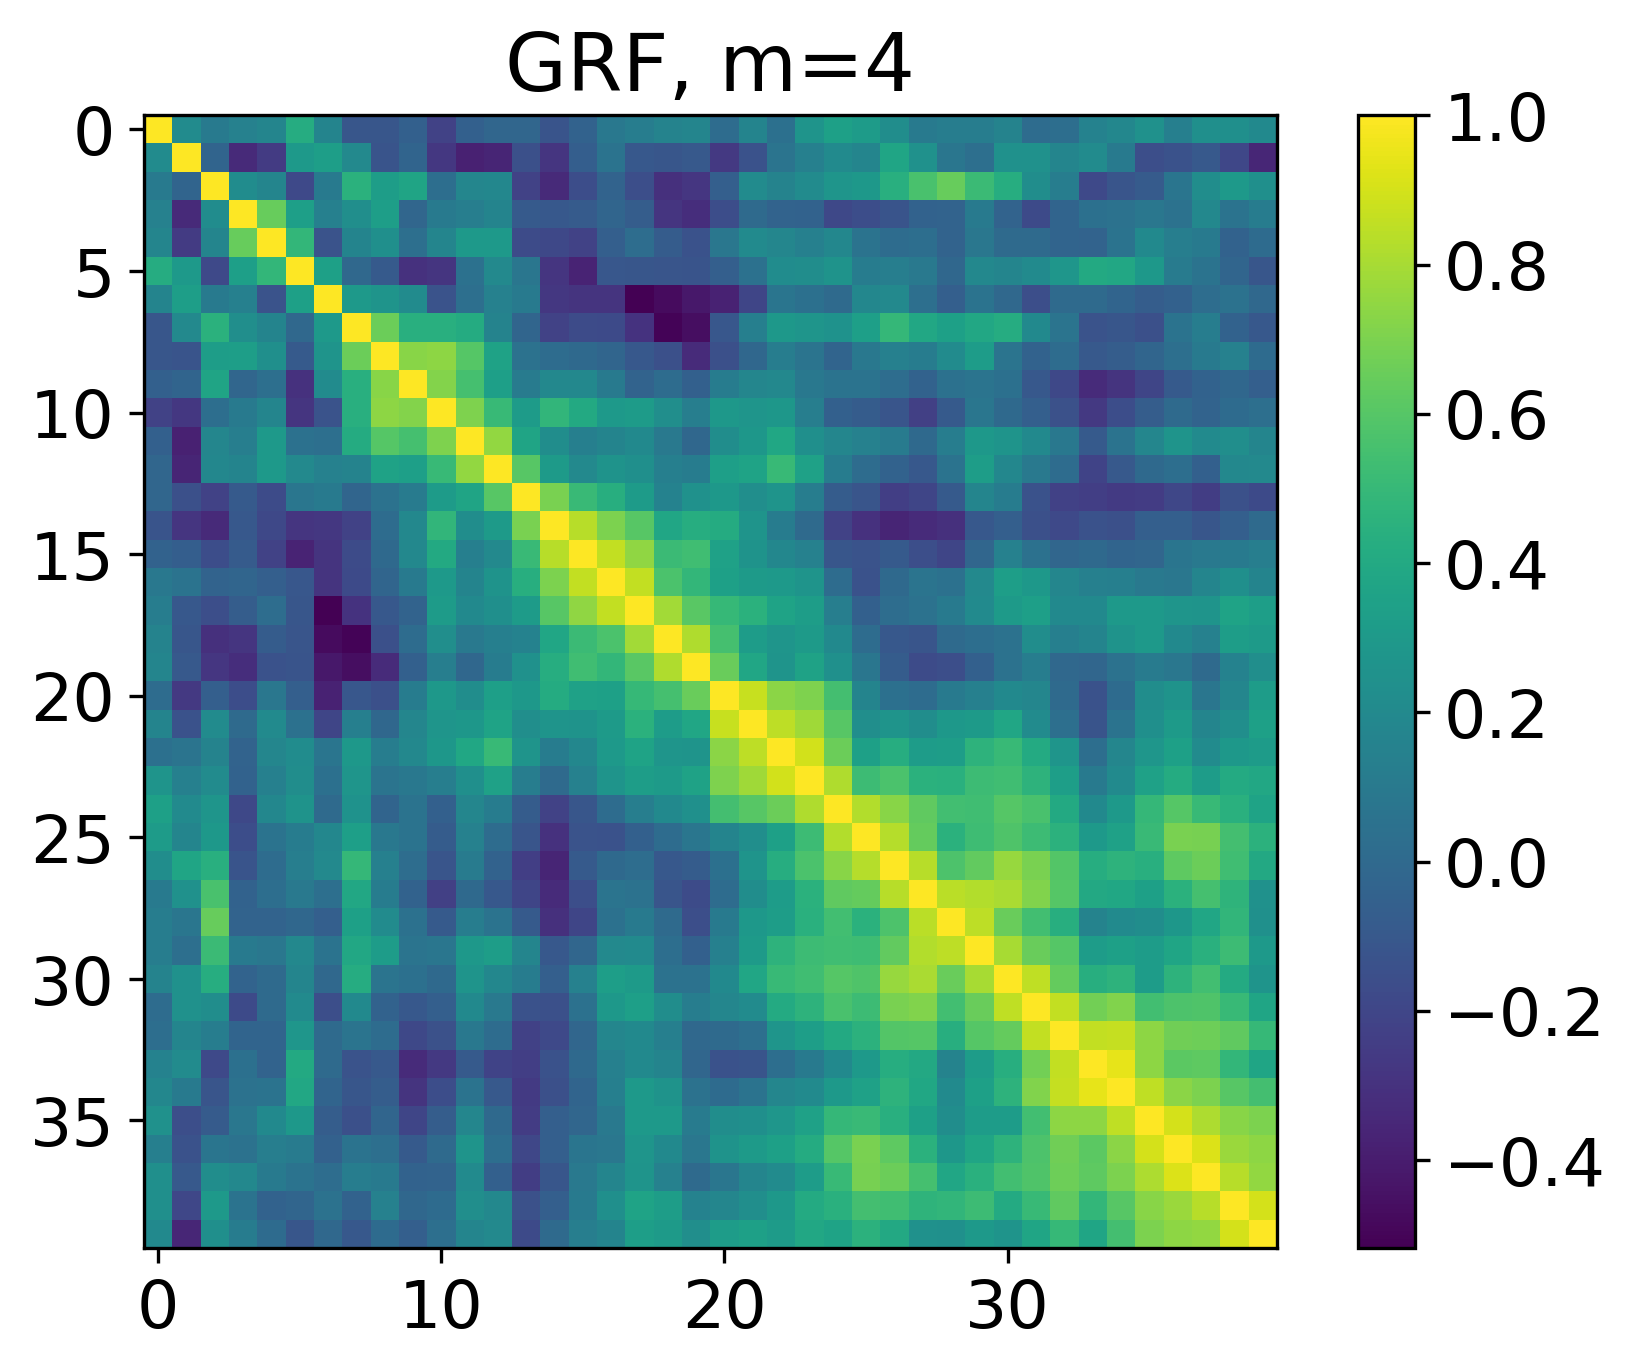

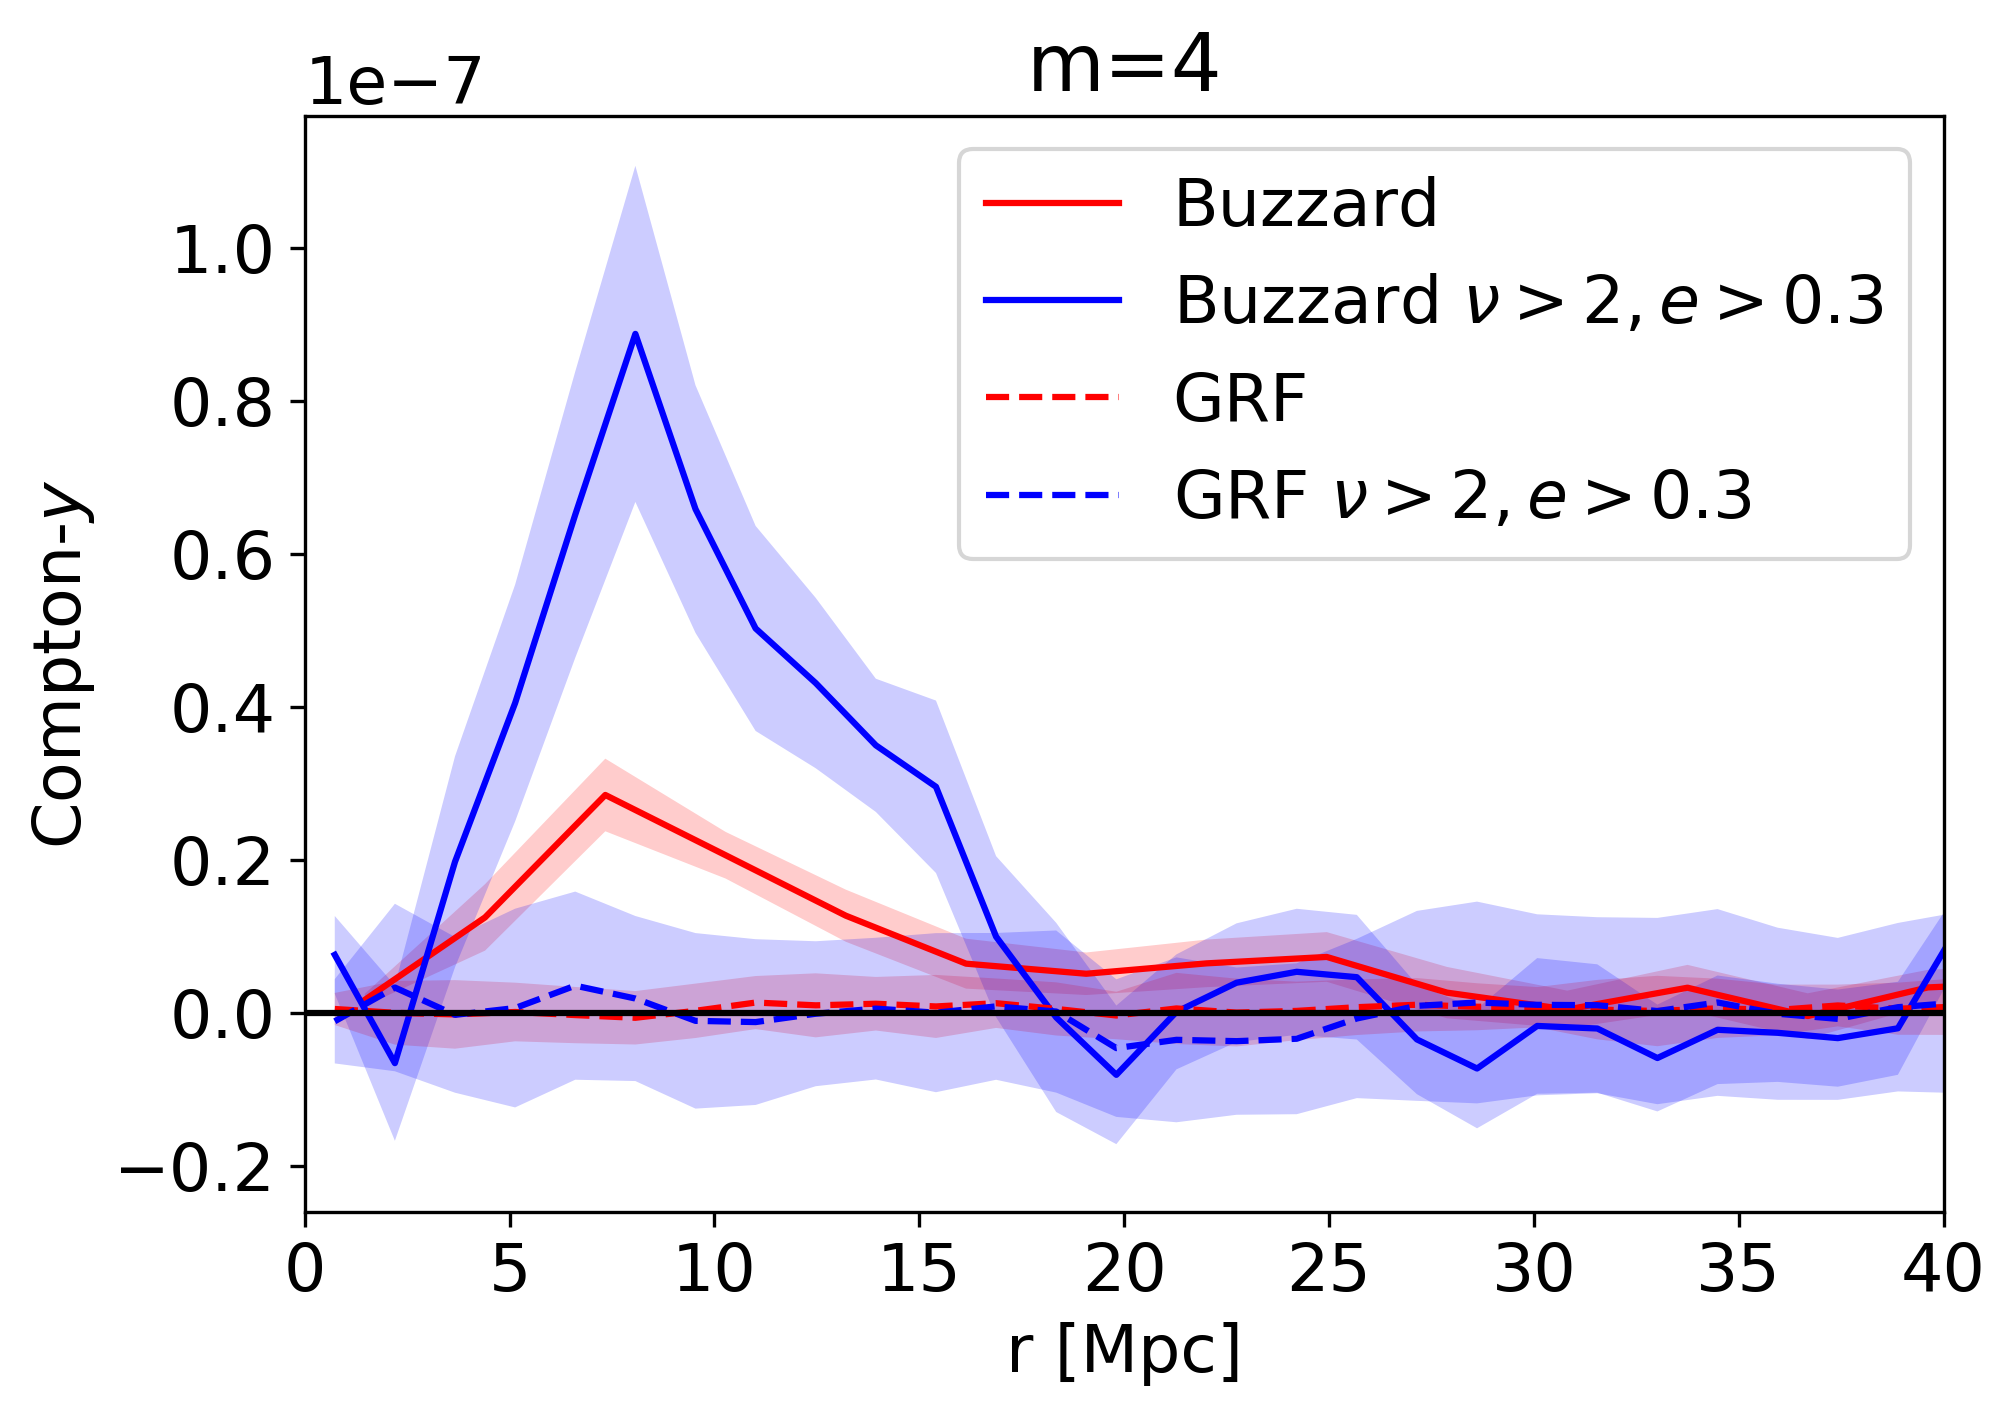

<Figure size 2100x1500 with 0 Axes>

In [18]:
# buzzard_profs = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_640_1418Mpc_13pt9Mpc_allnu_alle_smth_24reg_m0to5_profiles.pkl")
# buzzard_profs_thr = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_640_1418Mpc_13pt9Mpc_nugt2_egtpt3_smth_24reg_m0to5_profiles.pkl")
# grf_profs     = np.load("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_640_1418Mpc_13pt9Mpc_allnu_alle_smth_24reg_m0to5_profiles.pkl")
# grf_profs_thr     = np.load("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_640_1418Mpc_13pt9Mpc_nugt2_egtpt3_smth_24reg_m0to5_profiles.pkl")

buzzard_profs = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_1418_1945Mpc_13pt9Mpc_allnu_alle_smth_24reg_m0to5_profiles.pkl")
buzzard_profs_thr = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_1418_1945Mpc_13pt9Mpc_nugt2_egtpt3_smth_24reg_m0to5_profiles.pkl")
grf_profs     = np.load("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_1418_1945Mpc_13pt9Mpc_smth_24map_m0to5_profiles.pkl")
grf_profs_thr     = np.load("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_1418_1945Mpc_13pt9Mpc_nugt2_egtpt3_smth_24map_m0to5_profiles.pkl")

# buzzard_profs = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_1945_2427Mpc_13pt9Mpc_allnu_alle_smth_24reg_m0to5_profiles.pkl")
# buzzard_profs_thr = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/Buzzard_lambdagt10_1945_2427Mpc_13pt9Mpc_nugt2_egtpt3_smth_24reg_m0to5_profiles.pkl")
# grf_profs     = np.load("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_1945_2427Mpc_13pt9Mpc_smth_24map_m0to5_profiles.pkl")
# grf_profs_thr     = np.load("/mnt/scratch-lustre/mlokken/stacking/GRF_buzzspec/GRF_lambdagt10_1945_2427Mpc_13pt9Mpc_nugt2_egtpt3_smth_24map_m0to5_profiles.pkl")

for m in [0,2,4]:
    
    binned_r_grf, y_mean_grf, covmat_grf, cormat_grf, errs_grf, npks_tot_grf = cpp.getprofs_sims(grf_profs, 24, m)[5:]
    binned_r_grf_thr, y_mean_grf_thr, covmat_grf_thr, cormat_grf_thr, errs_grf_thr, npks_tot_grf_thr = cpp.getprofs_sims(grf_profs_thr, 24, m)[5:]
    binned_r_b, y_mean_b, covmat_b, cormat_b, errs_b, npks_tot_b = cpp.getprofs(buzzard_profs, 24, m)[5:]
    binned_r_b_thr, y_mean_b_thr, covmat_b_thr, cormat_b_thr, errs_b_thr, npks_tot_b_thr = cpp.getprofs(buzzard_profs_thr, 24, m)[5:]
    
    print("GRF npeaks", grf_profs['npks_map0'], grf_profs_thr['npks_map0'])
    print("Buzzard npkeas", npks_tot_b, npks_tot_b_thr)
    
    plt.imshow(cormat_b)
    plt.colorbar()
    plt.title("Buzzard, m={:d}".format(m))
    plt.show()
    plt.clf()
    plt.imshow(cormat_grf)
    plt.colorbar()
    plt.title("GRF, m={:d}".format(m))
    plt.show()
    plt.clf()
    
    plt.fill_between(binned_r_b, y_mean_b-errs_b, y_mean_b+errs_b, alpha = 0.2, color='red', lw=0)
    plt.fill_between(binned_r_b_thr, y_mean_b_thr-errs_b_thr, y_mean_b_thr+errs_b_thr, alpha = 0.2, color='blue', lw=0)
    plt.fill_between(binned_r_grf, y_mean_grf-errs_grf, y_mean_grf+errs_grf, alpha = 0.2, color='red', lw=0)
    plt.fill_between(binned_r_grf_thr, y_mean_grf_thr-errs_grf_thr, y_mean_grf_thr+errs_grf_thr, alpha = 0.2, color='blue', lw=0)
    plt.plot(binned_r_b, y_mean_b, color='red', label='Buzzard')
    plt.plot(binned_r_b_thr, y_mean_b_thr, color='blue', label=r'Buzzard $\nu>2, e>0.3$')
    plt.plot(binned_r_grf, y_mean_grf,color='red', label='GRF', linestyle='--')
    plt.plot(binned_r_grf_thr, y_mean_grf_thr,color='blue', label=r'GRF $\nu>2, e>0.3$', linestyle='--')
    plt.plot([0,40], [0,0], 'k')
    if m==0:
        plt.ylim([0,5e-7])
    plt.xlim([0,40])
    plt.xlabel("r [Mpc]")
    plt.ylabel("Compton-$y$")
    plt.title("m={:d}".format(m))
    plt.legend()
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout()
    plt.savefig("/home/mlokken/oriented_stacking/plots/grf_buzzard_comparison_bin2_meq{:d}.png".format(m), dpi=300)
    plt.show()
    plt.clf()
